## Manual Time Series Implementation

In [3]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#load dataset from cleaning notebook
df = pd.read_csv("household_power_cleaned.csv", parse_dates=["Datetime"], index_col="Datetime")

#target variable
power_df = df["Global_active_power"].copy()
power_df.head()

Datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
Name: Global_active_power, dtype: float64

In [13]:
#option1: hourly average power
hourly = power_df.resample("H").mean()
#option2: daily average power
daily = power_df.resample("D").mean()

print("Original length:", len(power_df))
print("Hourly length:", len(hourly))
print("Daily length:", len(daily))

#choose metric to model
#ts = hourly.dropna()
ts = daily.dropna()
ts.head()

Original length: 2049280
Hourly length: 34589
Daily length: 1442


Datetime
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
Name: Global_active_power, dtype: float64

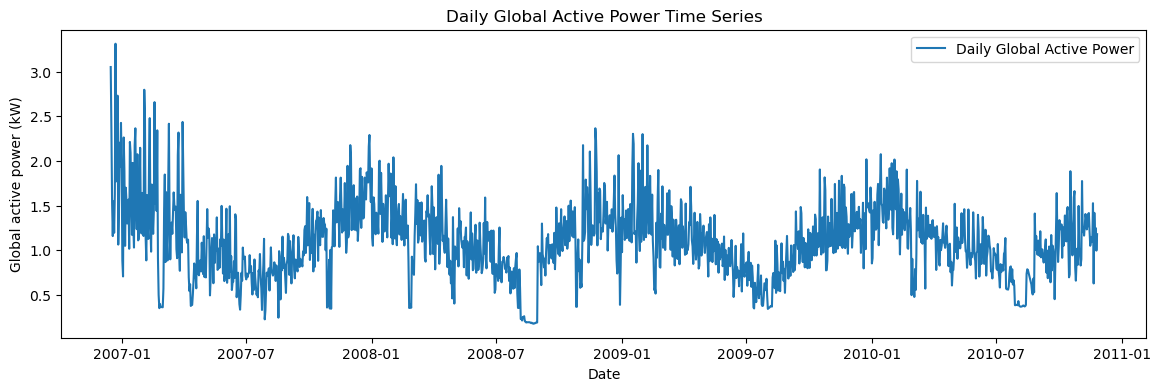

In [15]:
#initial plot
plt.figure(figsize=(14, 4))
plt.plot(ts, label="Daily Global Active Power")
plt.xlabel("Date")
plt.ylabel("Global active power (kW)")
plt.title("Daily Global Active Power Time Series")
plt.legend()
plt.show()

<Figure size 1000x400 with 0 Axes>

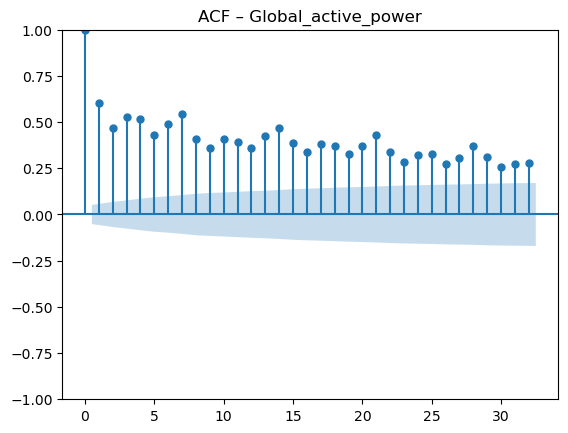

<Figure size 1000x400 with 0 Axes>

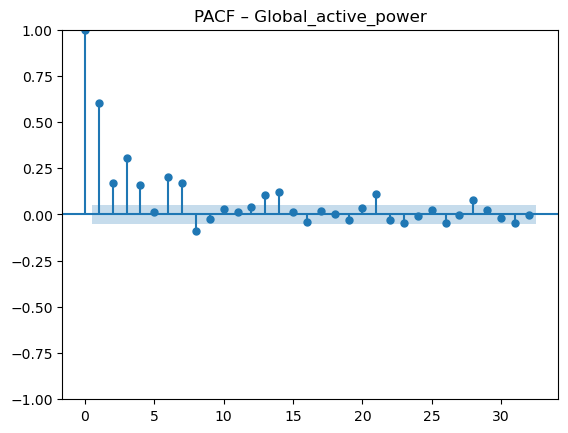

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#daily averages
series_for_lags = ts

plt.figure(figsize=(10, 4))
plot_acf(series_for_lags, title="ACF – Global_active_power")
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(series_for_lags, title="PACF – Global_active_power")
plt.show()